# Quantitative Evaluation - Region of Interest

The purpose of this notebook is to do quantitative evaluation of the detection algorithm by comparing the detected cell counts with the annotated counts of various regions of interest

Processing cell_detection_9: 100%|██████████| 10/10 [00:26<00:00,  2.67s/it]


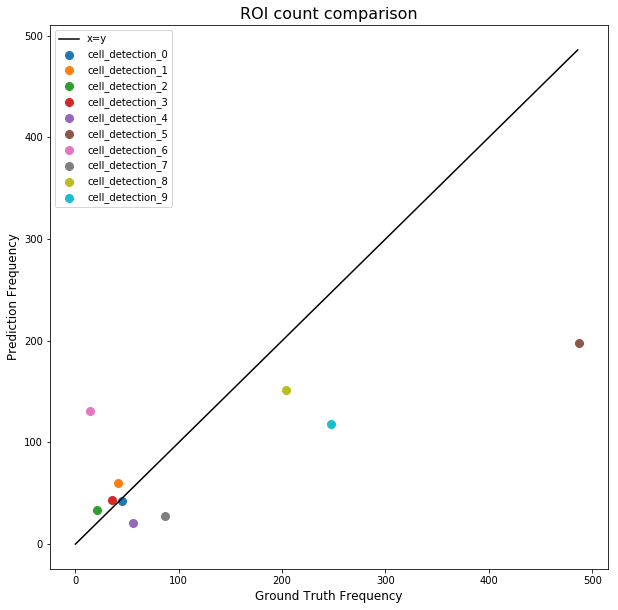

Exp_name: precision, recall, accuracy
cell_detection_0: 0.619, 0.897, 57.778
cell_detection_1: 0.517, 0.62, 75.61
cell_detection_2: 0.588, 0.606, 95.238
cell_detection_3: 0.558, 0.75, 68.571
cell_detection_4: 0.952, 0.364, 35.714
cell_detection_5: 0.949, 0.394, 38.604
cell_detection_6: 0.092, 0.093, 85.714
cell_detection_7: 1.0, 0.322, 32.184
cell_detection_8: 0.836, 0.709, 62.255
cell_detection_9: 0.797, 0.422, 38.057


In [2]:
from IPython.core.pylabtools import figsize
figsize(10, 10)

from src.BlobDetector import BlobDetector
from src.BlobMetrics import BlobMetrics
from src import util
from tqdm import tqdm
import numpy as np

from matplotlib import pyplot as plt

roi_prefix = 'cell_detection'
raw_img_paths = ['data/s3617/tifs/{}_{}.tiff'.format(roi_prefix, i) for i in range(10)]
csv_output_paths = ['data/s3617/prediction_csv/{}_{}.csv'.format(roi_prefix, i) for i in range(10)]
annotation_paths = ['data/s3617/annotations/{}_{}.csv'.format(roi_prefix, i) for i in range(10)]
n_components = [2 if i <= 3 else 3 for i in range(10)]

path_pbar = tqdm(raw_img_paths)

count_map = []
metrics_arr = []

for i, path in enumerate(path_pbar):
    path_pbar.set_description('Processing {}_{}'.format(roi_prefix, i))
    
    detector = BlobDetector(path, n_components[i])
    
    gt_centroids = util.get_list_from_csv(annotation_paths[i])
    centroids = detector.get_blob_centroids()
    
    metrics_arr.append(BlobMetrics(gt_centroids, centroids, euclidean_distance_threshold=12))
    
    predicted_count = len(centroids)
    gt_count = len(gt_centroids)    
    
    count_map.append((gt_count, predicted_count))

(fig, ax) = plt.subplots()

ax.set_xlabel('Ground Truth Frequency', fontsize=12)
ax.set_ylabel('Prediction Frequency', fontsize=12)
ax.set_title('ROI count comparison', fontsize=16)

max_count = max([max(i) for i in count_map])

ax.plot(np.arange(max_count), np.arange(max_count), label='x=y', color='k')

for i, c in enumerate(count_map):
    ax.scatter(c[0], c[1], label='{}_{}'.format(roi_prefix, i), s=64)
ax.legend()

plt.show()
    

print('Exp_name: precision, recall, accuracy')
for i, met in enumerate(metrics_arr):
    print('cell_detection_{}: {}, {}, {}'.format(i, met.precision(), met.recall(), met.accuracy()))
    
